## Load library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The ‘Comfort Votes.csv’ and ‘Outside Air Temp test.csv’ are actual datasets provided by the Energy Conservation office. It is recommended that you use a Jupyter Notebook so that it is easy to view your code and the results of each task.
 
 (Language: Python, with the pandas library and any other library for data analysis)
Some of this data may need some cleaning in order to accomplish the task such as dropping NaNs or removing data that is incorrect such as values like ‘Sun” under comfort votes. Buildings may also need to be renamed so that they all keep the same casing.
 
1.    Load in the ‘Comfort Votes.csv’ data into a DataFrame and ensure that the ‘Comfort’ column only contains ‘Hot’, ‘Warm’, ‘Perfect’, ‘Chilly’ and ‘Cold ‘votes (it is recommended that you make each comfort type follow a case of your choosing such as HOT or Hot so that indexing and searching for votes is accurate and consistent). Identify the top three buildings that had the most votes and plot (in any form that makes sense).
 
2.     Break down the votes of these top three buildings by type of Vote. 
(ie. Tercero 200 total, 
23 Hot Votes, 
67 Warm Votes, 
41 Perfect Votes,
15  Chilly Votes,
54 Cold Votes )
 
3.     Determine what month has the most votes and plot in a way that is intuitive and displays the top 5 months.
 
4.     Merge ‘Chilly ‘Votes with ‘Cold’ Votes, ‘Warm’ Votes with ‘Hot’ votes and replot all votes by Hot, Perfect and Cold for all time
 
5.     Create 2 subplots in which the merged votes from task 4 are broken down by faculty and student.
 
6.     Append the 'Outside Air Temp test.csv' to the thermoostat DataFrame ensuring that the nearest temperature to the vote is attached to each vote. Below is an example of a merge between the comfort votes and the outside air temperature:

## Step 1

Load in the ‘Comfort Votes.csv’ data into a DataFrame and ensure that the ‘Comfort’ column only contains ‘Hot’, ‘Warm’, ‘Perfect’, ‘Chilly’ and ‘Cold ‘votes (it is recommended that you make each comfort type follow a case of your choosing such as HOT or Hot so that indexing and searching for votes is accurate and consistent). Identify the top three buildings that had the most votes and plot (in any form that makes sense).

## Hard coding
BAD!!!

In [46]:
["A", "B"].lower()

AttributeError: 'list' object has no attribute 'lower'

In [107]:
votedata = pd.read_csv("Comfort Votes.csv", header = 0)
votedata = votedata.loc[votedata["comfort"].isnull() == False]
votedata["comfort"] = votedata["comfort"].str.lower()
votedata = votedata.loc[votedata["comfort"].isin([x.lower() for x in ["Hot", "Warm", "Perfect", "Chilly","Cold"]])]
#votedata.head()
votedata["comfort"].value_counts()

cold       7289
hot        5142
chilly     4305
perfect    3102
warm       2308
Name: comfort, dtype: int64

No `NaN` in `comfort` column

In [7]:
votedata.shape

(26187, 10)

In [108]:
votedata.groupby("building")["room"].nunique()

building
1050 Extension Center Drive                6
1050 Extension Center Drive Trailer        1
1333 Reseac Park                           1
1333 research park                         1
1441 Research Park Drive                   2
1441 research park drive                   1
150 Mrak Hall                              0
1605 Tilia                                 1
1605 Tilia Stree                           1
1605 tilia                                 1
1660 drew circle                           1
1715 tilia                                 1
1850 Resarch Park Drive                    1
1850 Research Park                         1
1850 Research Park Dr.                     1
1850 Research Park Drive                   4
1850 research park                         2
208                                        1
2205 Haring Hall                           0
260 Cousteau                               1
260 cousteau                               2
3820 Chiles Rd                             1
4

## 2. Break down the votes of these top three buildings by type of Vote.

In [51]:
votedata.head()

,Unnamed: 0,isFaculty,isStaff,isStudent,building,buildingKey,room,comfort,quarter,timestamp,activity,clothing
0,0,FALSE,False,True,Giedt Hall,DV-01-001586,1003,chilly,fall2014,Sat Nov 01 2014 11:50:00 GMT-0700 (PDT),NaN,NaN
1,1,FALSE,False,True,Tercero Community,DV-01-000536,410a,warm,fall2014,Sat Nov 01 2014 12:15:00 GMT-0700 (PDT),NaN,NaN
2,2,FALSE,False,False,Regan Main,DV-01-000348,"Paloma building,210A",cold,fall2014,Sat Nov 01 2014 14:04:00 GMT-0700 (PDT),NaN,NaN
3,3,FALSE,False,True,Segundo Miller,DV-01-001564,420,cold,fall2014,Sat Nov 01 2014 14:44:00 GMT-0700 (PDT),NaN,NaN
4,4,FALSE,False,True,Memorial Union,DV-01-000152,Market Place,perfect,fall2014,Sat Nov 01 2014 16:38:00 GMT-0700 (PDT),NaN,NaN


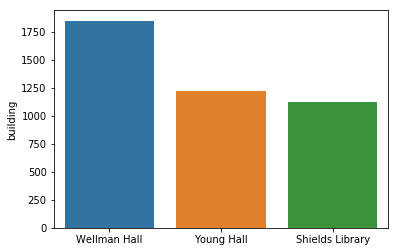

In [109]:
bdcounts = votedata["building"].value_counts()
sns.barplot(x=bdcounts.index[0:3], y=bdcounts[0:3])

In [66]:
len(bdcounts)

411

## Step 2

Break down the votes of these top three buildings by type of Vote. (ie. Tercero 200 total, 23 Hot Votes, 67 Warm Votes, 41 Perfect Votes, 15 Chilly Votes, 54 Cold Votes )

In [110]:
votedata.loc[votedata["building"].isin(["Wellman Hall", "Young Hall" ,"Shields Library"])].groupby("building")["comfort"].value_counts()

building         comfort
Shields Library  cold       388
                 chilly     351
                 perfect    212
                 hot         99
                 warm        72
Wellman Hall     cold       610
                 hot        467
                 chilly     358
                 perfect    213
                 warm       199
Young Hall       cold       638
                 hot        280
                 chilly     203
                 warm        58
                 perfect     38
Name: comfort, dtype: int64

## step 3. Determine what month has the most votes and plot in a way that is intuitive and displays the top 5 months.

In [111]:
votedata["timestamp"] = pd.to_datetime(votedata["timestamp"])

In [112]:
votedata["month"] = votedata["timestamp"].map(lambda x: x.month)

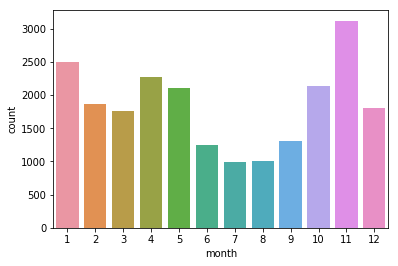

In [113]:
sns.countplot(data = votedata, x = "month")

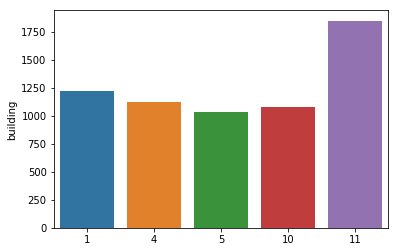

In [81]:
mtcount = votedata["month"].value_counts()
sns.barplot(x=mtcount.index[0:5], y=bdcounts[0:5])

##  step 4 Merge ‘Chilly ‘Votes with ‘Cold’ Votes, ‘Warm’ Votes with ‘Hot’ votes and replot all votes by Hot, Perfect and Cold for all time


In [117]:
votedata["comfort"]=="chilly" 

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
26148    False
26149    False
26150    False
26152    False
26153    False
26155    False
26156    False
26157    False
26159    False
26160    False
26161    False
26162    False
26163    False
26164    False
26165    False
26167    False
26168    False
26169    False
26170    False
26172    False
26174    False
26176    False
26177    False
26178    False
26179    False
26180    False
26182    False
26183    False
26184    False
26185    False
Name: comfort, Length: 22146, dtype: bool

In [118]:
votedata.loc[votedata["comfort"]=="chilly", "comfort"] = "cold"

In [119]:
votedata.loc[votedata["comfort"]=="warm", "comfort"] = "hot"

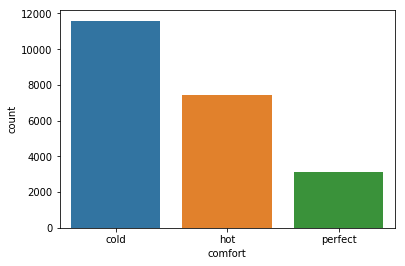

In [120]:
sns.countplot(x=votedata["comfort"])

## step4 Create 2 subplots in which the merged votes from task 4 are broken down by faculty and student.

In [ ]:
votedata.loc[votedata["isFaculty"]=="0", "isFaculty"] = "FALSE"
votedata.loc[votedata["isFaculty"]=="1", "isFaculty"] = "TRUE"

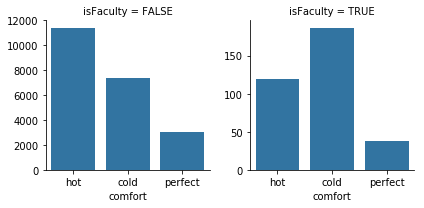

In [124]:
g = sns.FacetGrid(votedata, col="isFaculty", sharey = False)
g = g.map(sns.countplot,"comfort")

## Step 6. Append the 'Outside Air Temp test.csv' to the thermoostat DataFrame ensuring that the nearest temperature to the vote is attached to each vote. Below is an example of a merge between the comfort votes and the outside air temperature:

In [133]:
thermoostat = pd.read_csv("Outside Air Temp test.csv", header = 0, names = ["timestamp","temp"] )

In [135]:
thermoostat["timestamp"] = pd.to_datetime(thermoostat["timestamp"])

In [202]:
thermoostat.head()

,timestamp,temp
0,2016-01-01 08:00:00,40.409643
1,2016-01-01 09:00:00,40.079128
2,2016-01-01 10:00:00,40.090998
3,2016-01-01 11:00:00,40.114107
4,2016-01-01 12:00:00,39.902123


In [180]:
votedata["timestamp"] =votedata["timestamp"].dt.tz_localize(None)

In [ ]:
pd.to_datetime(30)

In [220]:
def gettemp(time):
    hit = np.abs((time - thermoostat["timestamp"]) / pd.Timedelta("1 minutes")) < 30
    hitNum = np.sum(hit)
    if hitNum == 0:
        return None
    else:
        return thermoostat.loc[hit, "temp"].tolist()[0]

In [ ]:
votedata["temperature"] = votedata["timestamp"].apply(gettemp)

In [205]:
votedata.tail()

,Unnamed: 0,isFaculty,isStaff,isStudent,building,buildingKey,room,comfort,quarter,timestamp,activity,clothing,month,temperature
26180,26180,FALSE,False,True,Hunt Hall,DV-01-000092,168,perfect,fall2018,2018-10-15 09:07:24,inactive,normal,10,"24433 61.308192 Name: temp, dtype: float64"
26182,26182,FALSE,False,True,Bainer Hall,DV-01-000462,1060,cold,fall2018,2018-10-15 09:33:15,inactive,normal,10,"24434 61.616868 Name: temp, dtype: float64"
26183,26183,FALSE,False,True,Haring Hall,DV-01-000098,1227,cold,fall2018,2018-10-15 09:34:11,inactive,normal,10,"24434 61.616868 Name: temp, dtype: float64"
26184,26184,FALSE,True,True,Haring Hall,DV-01-000098,1227,cold,fall2018,2018-10-15 09:43:22,inactive,heavy,10,"24434 61.616868 Name: temp, dtype: float64"
26185,26185,FALSE,True,True,Art Building,DV-01-000451,204,hot,fall2018,2018-10-15 09:57:48,inactive,light,10,"24434 61.616868 Name: temp, dtype: float64"
